In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
#load the Huppenkothen classification file
clean_belloni = open('1915Belloniclass_updated.dat')
lines = clean_belloni.readlines()
states = lines[0].split()
belloni_clean = {}
for h,l in zip(states, lines[1:]):
    belloni_clean[h] = l.split()
    #state: obsID1, obsID2...
ob_state = {}
for state, obs in belloni_clean.items():
    if state == "chi1" or state == "chi2" or state == "chi3" or state == "chi4": state = "chi"
    for ob in obs:
        ob_state[ob.replace("-","")] = state

phi


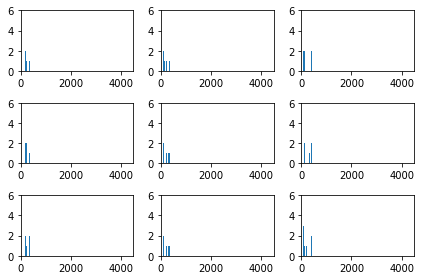

beta


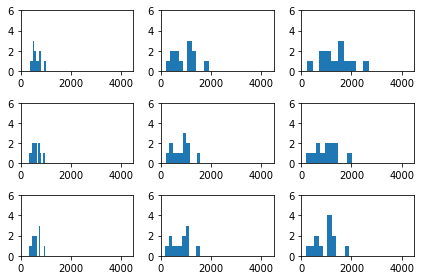

delta


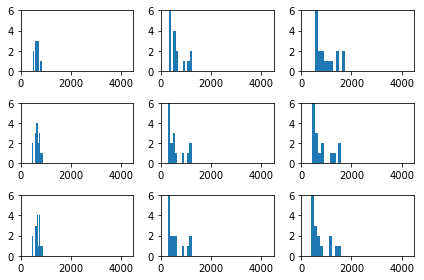

alpha


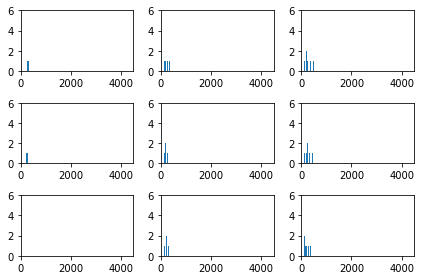

theta


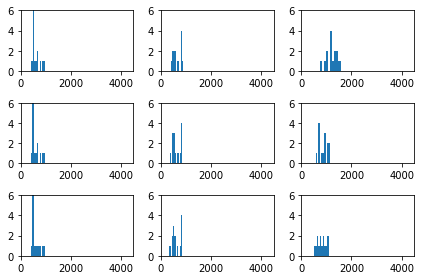

kappa


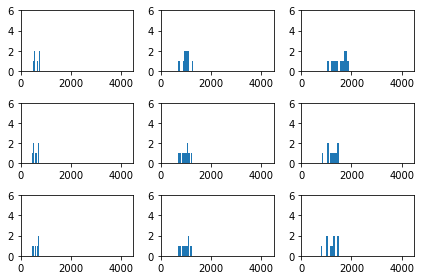

mu


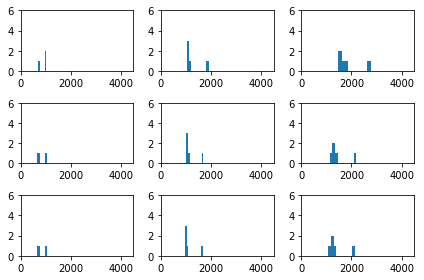

chi


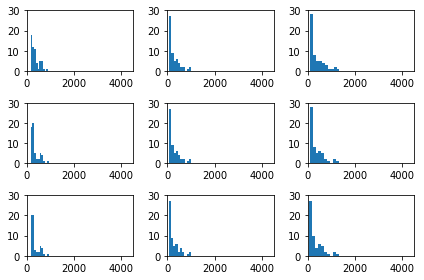

gamma


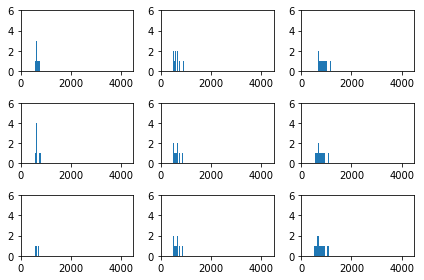

In [40]:
#plot histograms of error values for all classes except from rho
class_names=["rho","phi", "beta","delta","alpha","theta","kappa","mu","chi","gamma"]
results=np.loadtxt("valid_results_20190422.csv", dtype=float, delimiter=",")
results=results.reshape((3,3,151,6))
for class_index in range(1,10):
    n=0
    for k, clusters in enumerate(results):
        for l, length in enumerate(clusters):
            n+=1
            #for s, slide in enumerate(length):# k, l and s are the three different hyperparameters validated
            errors=length[14:,:]
            class_error_indices=np.where(errors[:,3]==class_index)[0]
            class_errors = errors[class_error_indices]
            #print(class_index,k,l,s,np.mean(class_errors[:,-1]))
            plt.subplot(3,3,n)
            plt.hist(class_errors[:,-1], alpha = 1)
            plt.xlim([0,4500])
            if class_index==8:
                plt.ylim([0,30])
            else:
                plt.ylim([0,6])
    print(class_names[class_index])
    plt.tight_layout()
    plt.show()

In [27]:
for i in results:
    for x in i:
        print(x)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  2.04020134e+10 4.72590603e+02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00
  2.04020103e+10 5.21808425e+02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 2.00000000e+00
  3.07030129e+10 5.06236270e+02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 3.00000000e+00
  4.07030123e+10 5.42384219e+02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 4.00000000e+00
  2.04020134e+10 4.56472968e+02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 5.00000000e+00
  3.07030127e+10 5.04570721e+02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 6.00000000e+00
  4.04030105e+10 4.95939746e+02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 7.00000000e+00
  4.07030107e+10 4.59162430e+02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 8.00000000e+00
  2.04020130e+10 3.69117469e+02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 9.00000000e+00
  3.07030128e+10 4.66103584e+02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.0

/home/jkok1g14/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


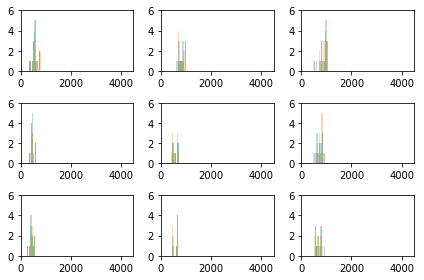

In [38]:
results=np.loadtxt("valid_results_20190415.csv", dtype=float, delimiter=",")
results=results.reshape((3,3,3,151,6))
# plot error histograms for the rho class only (training class)
n=0
for k, clusters in enumerate(results):
    for l, length in enumerate(clusters):
        n+=1
        for s, slide in enumerate(length):# k, l and s are the three different hyperparameters validated
            errors=slide[:14,:]
#             class_error_indices=np.where(errors[:,3]==class_index)[0]
#             class_errors = errors[class_error_indices]
            #print(class_index,k,l,s,np.mean(class_errors[:,-1]))
            plt.subplot(3,3,n)
            plt.hist(errors[:,-1], alpha = 0.3)
            plt.xlim([0,4500])
            plt.ylim([0,6])
plt.tight_layout()
plt.show()

In [16]:
#find the observation IDs of the worst and best reconstructions to see why they're so different
for class_index in range(10):
    for k, clusters in enumerate(results):
        for l, length in enumerate(clusters):
            for s, slide in enumerate(length):# k, l and s are the three different hyperparameters validated
#                 max_rho=np.max(slide[:14,-1])
#                 mean_rho=np.mean(slide[:14,-1])
                if class_index ==6:
                    continue
                errors=slide[14:,:]
                class_error_indices=np.where(errors[:,3]==class_index)[0]
                class_errors = errors[class_error_indices]
                min_error=np.min(class_errors[:,-1])
                min_obs_index= np.where(class_errors[:,-1]==min_error)[0][0]
                min_obs=class_errors[min_obs_index][-2]
                max_error=np.max(class_errors[:,-1])
                max_obs_index= np.where(class_errors[:,-1]==max_error)[0][0]
                max_obs=class_errors[max_obs_index][-2]
                
                print(class_names[class_index],k,l,s, min_error, min_obs, max_error, max_obs)

beta 0 0 0 425.8541535695903 40703012201.0 2647.2590413254384 20402015300.0
beta 0 0 1 426.9192381864736 40703012201.0 2646.0921105033513 20402015300.0
beta 0 0 2 408.5052367702896 40703012201.0 2662.9714663239924 20402015300.0
beta 0 1 0 566.1057656981725 40703012201.0 3508.62635660482 20402015300.0
beta 0 1 1 627.8728014118919 40703012201.0 3487.978702907446 20402015300.0
beta 0 1 2 567.0798326515132 40703012201.0 3693.5232645177057 20402015300.0
beta 0 2 0 547.0282903564246 40703012201.0 3550.3305569268973 20402015300.0
beta 0 2 1 646.9407247470932 40703012201.0 3535.943988764004 20402015300.0
beta 0 2 2 563.5333118485134 40703012201.0 3549.6586132504494 20402015300.0
beta 1 0 0 348.56911417247517 40703012201.0 2479.444629782243 20402015300.0
beta 1 0 1 343.1835134091103 40703012201.0 2458.8565588916254 20402015300.0
beta 1 0 2 348.8462225690443 40703012201.0 2467.855604236121 20402015300.0
beta 1 1 0 288.791763842786 40703012201.0 3297.3368619365656 20402015300.0
beta 1 1 1 288.519

In [17]:
#mean and minimal error values from the repeated validation of 6/100 parameter values
#['rho', 1'phi', 2'alpha', 3'delta', 4chi', 5'mu', 6'gamma', 7'beta', 8'kappa', 9'theta']
results=np.loadtxt("valid_results_20190422.csv", dtype=float, delimiter=",")
max_rho=np.max(results[:14,-1])
mean_rho=np.mean(results[:14,-1])
for class_index in range(1,10):
    errors=results[14:,:]
    class_error_indices=np.where(errors[:,3]==class_index)[0]
    class_errors = errors[class_error_indices]
    print(class_index,k,l,s,np.mean(class_errors[:,-1])-mean_rho, np.min(class_errors[:,-1])-max_rho)

1 2 2 2 -192.90040135532246 -508.1428220241248
2 2 2 2 373.78922575082896 -408.68709148397664
3 2 2 2 210.56361891316675 -303.1170081216724
4 2 2 2 -205.11949601405195 -475.3846648046411
5 2 2 2 257.08075392120037 -242.2137328525926
6 2 2 2 468.3518123150437 -131.2860478051021
7 2 2 2 644.5341510679832 -176.7188210991136
8 2 2 2 -141.09327238060501 -507.35789994740765
9 2 2 2 223.19955926322115 -160.39594431097612


In [21]:
ob_state

{'20187020100': 'alpha',
 '20187020101': 'alpha',
 '20402012200': 'alpha',
 '20402012300': 'alpha',
 '20402012401': 'alpha',
 '20402012700': 'alpha',
 '20402012800': 'alpha',
 '20402013002': 'alpha',
 '10408011000': 'beta',
 '10408012100': 'beta',
 '20402014302': 'beta',
 '20402014400': 'beta',
 '20402014503': 'beta',
 '20402014600': 'beta',
 '20402015201': 'beta',
 '20402015202': 'beta',
 '20402015300': 'beta',
 '40703011800': 'beta',
 '40703011900': 'beta',
 '40703011901': 'beta',
 '40703012200': 'beta',
 '40703012201': 'beta',
 '40703013500': 'beta',
 '40703013501': 'beta',
 '20402013700': 'gamma',
 '20402013702': 'gamma',
 '20402013800': 'gamma',
 '20402013900': 'gamma',
 '20402013902': 'gamma',
 '20402014000': 'gamma',
 '20402015500': 'gamma',
 '20402015600': 'gamma',
 '20402015700': 'gamma',
 '40703011300': 'gamma',
 '40115010700': 'gamma',
 '40703013100': 'gamma',
 '10408011400': 'delta',
 '10408011401': 'delta',
 '10408011402': 'delta',
 '10408011403': 'delta',
 '10408011404': 

In [50]:
class_names=["rho","phi", "beta","delta","alpha","theta","kappa","mu","chi","gamma"]
results=np.loadtxt("valid_results_20190422.csv", dtype=float, delimiter=",")
results=results.reshape((3,3,151,6))
for classi in range(1,10):
    for k, clusters in enumerate(results):
        for l, length in enumerate(clusters):
            
            max_rho=np.max(length[:14,-1])
            mean_rho=np.mean(length[:14,-1])
            #for s, slide in enumerate(length):# k, l and s are the three different hyperparameters validated
            errors=length[14:]
            class_errors=np.where(errors[:,-3]==classi)
            errors=errors[class_errors]
            errors[:,-1]-=max_rho
            print(class_names[classi],k,l,np.min(errors[:,-1]))
#             np.where(errors[:,-3]==classi)
#     print(class_names[classi])

phi 0 0 -382.26525164612025
phi 0 1 -793.7115576169036
phi 0 2 -1036.8024771402454
phi 1 0 -348.15134111493126
phi 1 1 -546.1788784833174
phi 1 2 -861.3874621810827
phi 2 0 -336.35678778276343
phi 2 1 -567.8427046515417
phi 2 2 -900.5558649829512
beta 0 0 -209.36369881997416
beta 0 1 -685.0384448882572
beta 0 2 -910.7820308778788
beta 1 0 -195.65492690788244
beta 1 1 -444.4971461282064
beta 1 2 -743.0800735281623
beta 2 0 -191.6756397936997
beta 2 1 -468.8451574173019
beta 2 2 -795.5957021940363
delta 0 0 -88.40636064928026
delta 0 1 -565.8793955385729
delta 0 2 -583.2712172399702
delta 1 0 -62.861372877001486
delta 1 1 -350.9130343934831
delta 1 2 -528.3787830385869
delta 2 0 -56.80082874599907
delta 2 1 -363.2750740549977
delta 2 2 -577.6785996761864
alpha 0 0 -392.3151721412257
alpha 0 1 -740.729701614557
alpha 0 2 -1007.0546917752542
alpha 1 0 -359.17073074100074
alpha 1 1 -494.0574061898876
alpha 1 2 -828.6781092872207
alpha 2 0 -346.87048353079916
alpha 2 1 -511.10739758421124
al

In [1]:
import importlib
import os
import fnmatch
import numpy as np
from sklearn.model_selection import train_test_split
from collections import Counter
import csv
from sklearn import tree
import sys
sys.stdout.flush()
import math
import matplotlib.pyplot as plt
from matplotlib.table import Table
import segment_cluster as sc
import importlib
importlib.reload(sc)
from sklearn.cluster import KMeans
import pandas as pd

np.random.seed(0)

cwd = os.getcwd()
if cwd.split("/")[1] == "home":
    data_path="/home/jkok1g14/Documents/GRS1915+105/data/Std1_PCU2"
elif cwd.split("/")[1] == "export":
    data_path="/export/data/jakubok/GRS1915+105/Std1_PCU2"
else:
    print("Set the path of data directory!", Flush=True)

#creates a dictionary of observation_ID: "state" items for labeled observations
clean_belloni = open('1915Belloniclass_updated.dat')
lines = clean_belloni.readlines()
states = lines[0].split()
belloni_clean = {}
for h,l in zip(states, lines[1:]):
    belloni_clean[h] = l.split()
    #state: obsID1, obsID2...
ob_state = {}
for state, obs in belloni_clean.items():
    if state == "chi1" or state == "chi2" or state == "chi3" or state == "chi4": state = "chi"
    for ob in obs:
        ob_state[ob] = state

#creates a list of labeled observations with abailable data
available = []
pool=[]
#/home/jkok1g14/Documents/GRS1915+105/data
#/export/data/jakubok/GRS1915+105/Std1_PCU2
for root, dirnames, filenames in os.walk(data_path):
    for filename in fnmatch.filter(filenames, "*_std1_lc.txt"):
        available.append(filename)
for ob, state in ob_state.items():
    if ob+"_std1_lc.txt" in available:
        pool.append(ob)  

#create a list of arrays with time and counts for the set of Belloni classified observations
lc_dirs=[]
lcs=[]
ids=[]
for root, dirnames, filenames in os.walk(data_path):    
    for filename in fnmatch.filter(filenames, "*_std1_lc.txt"):
        if filename.split("_")[0] in pool:
            lc_dirs.append(os.path.join(root, filename))

            
#make 2D arrays for light curves, with columns of counts and time values
for lc in lc_dirs:
    ids.append(lc.split("/")[-1].split("_")[0])
    f=np.loadtxt(lc)
    f=np.transpose(f)#,axis=1)
    f=f[0:2]
    ###1s average and time check to eliminate points outside of GTIs
    f8t = np.mean(f[0][:(len(f[0])//8)*8].reshape(-1, 8), axis=1)
    f8c = np.mean(f[1][:(len(f[1])//8)*8].reshape(-1, 8), axis=1)
    #f8c=f8c-np.mean(f8c)#normalisation/mean centering/whatever you desire most
    rm_points = []
    skip=False
    for i in range(len(f8t)-1):
        if skip==True:
            skip=False
            continue
        delta = f8t[i+1]-f8t[i]
        if delta > 1.0:
            rm_points.append(i+1)
            skip=True   
    times=np.delete(f8t,rm_points)
    counts=np.delete(f8c,rm_points)
    lcs.append(np.stack((times,counts)))

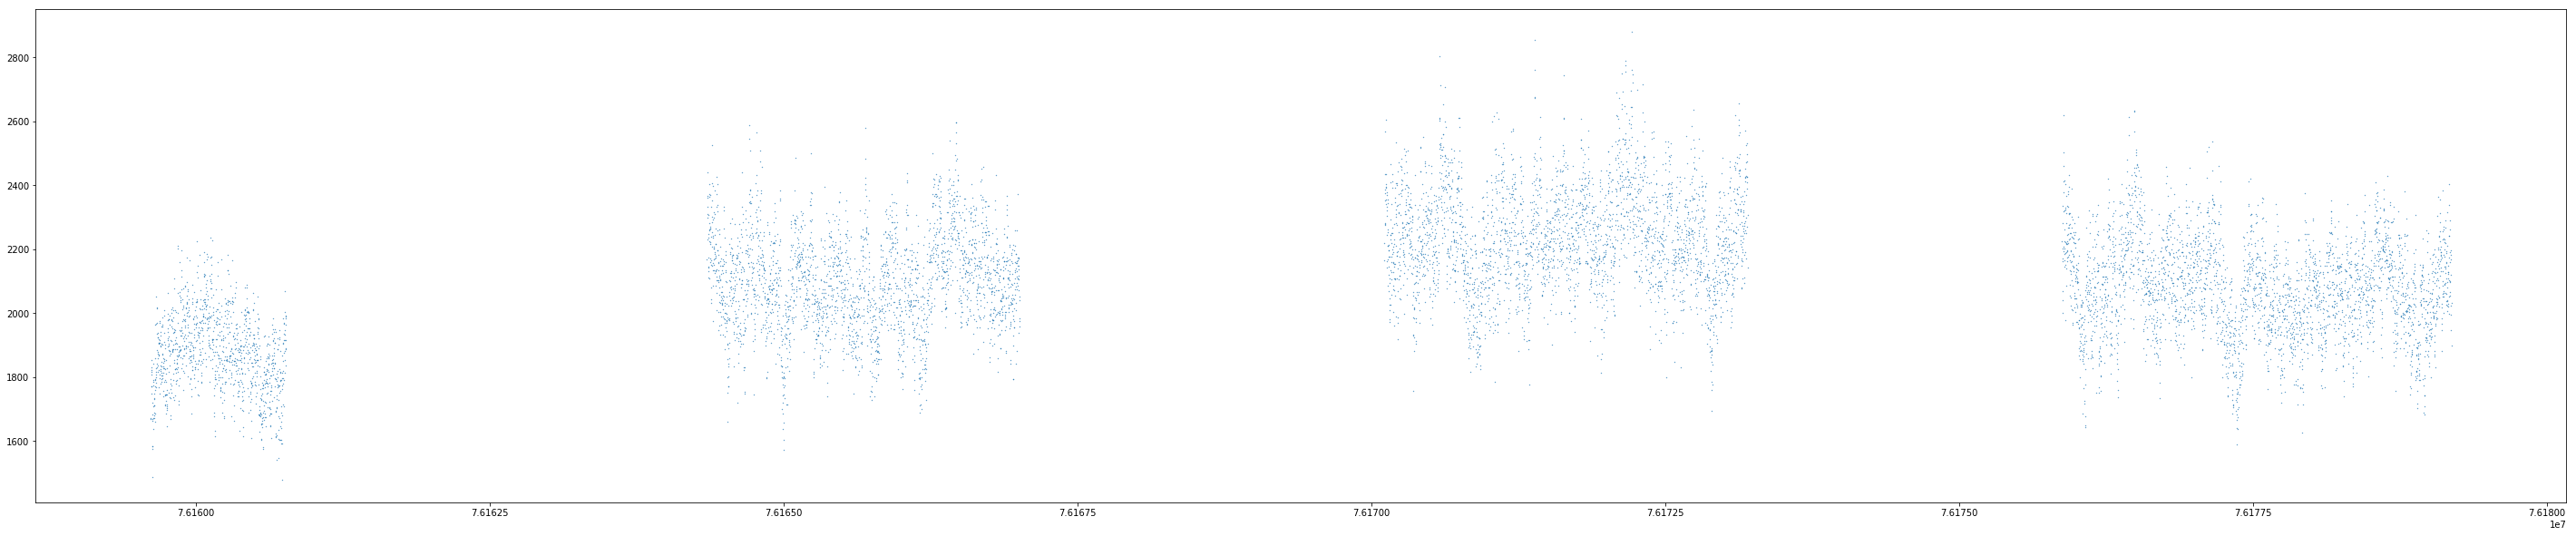

In [18]:
plt.gcf().set_size_inches(50,10)
#plt.figure(figsize=(20,10))
for lc in lcs:
    plt.scatter(lc[0],lc[1],s=0.1)
    break
#plt.savefig('test2png.png', dpi=600)
plt.show()